In [1]:
import h5py
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
# open the embeddings file in data/t5_embeddings/t5_embeddings/reduced_embeddings_file.h5

embeddings = h5py.File('../data/t5_embeddings/t5_embeddings/reduced_embeddings_file.h5', 'r')
# with h5py.File('../data/t5_embeddings/t5_embeddings/reduced_embeddings_file.h5', "r") as file:
#     print(f"number of entries: {len(file.items())}")
#     for original_id, embedding in file.items():
#         print(
#             f"  id: {original_id}, "
#             # f"  embeddings shape: {embedding.shape}, "
#             # f"  embeddings mean: {np.array(embedding).mean()}"
#         )
        

In [3]:
len(embeddings.items())

71097

In [4]:
# embeddings.items() to a dictionary

embeddings_dict = {original_id: np.array(embedding) for original_id, embedding in embeddings.items()}

/var/folders/xy/wf6xxhnx3hx557yklnkjk7zr0000gn/T/ipykernel_94481/765365731.py:3: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  embeddings_dict = {original_id: np.array(embedding) for original_id, embedding in embeddings.items()}


In [5]:
# create a pandas dataframe from the dictionary

df = pd.DataFrame.from_dict(embeddings_dict, orient='index')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0001d00679c3edc37cdcd99f874948e7,0.030823,-0.016541,-0.034546,0.014923,0.001572,0.041656,-0.033417,-0.080444,0.029770,0.008392,...,-0.019196,-0.033722,-0.025543,-0.072754,0.015602,0.044617,-0.004486,-0.018173,0.046082,0.036438
0003d00df7376f090bf85ceba2f629d7,0.007744,-0.011551,0.008904,-0.014496,-0.033875,0.020859,0.005775,-0.080078,-0.125122,0.023987,...,-0.023590,-0.012299,-0.057129,-0.094116,0.022308,0.069824,-0.064880,0.002041,-0.009750,-0.023254
00042c3b4d2fcd63cd5b849d9a77a4c6,0.027817,0.022003,0.043823,0.012970,-0.006317,-0.022446,0.064026,-0.100281,0.027512,0.004910,...,-0.004158,-0.038879,-0.051392,-0.045288,0.031250,0.017410,0.021637,-0.003487,0.017960,0.007179
00052c475e323faabd269824c21f54c0,0.001057,0.015198,-0.037170,0.021622,-0.028687,0.027969,-0.022659,-0.055878,-0.000194,-0.012436,...,0.007122,0.027359,-0.007935,-0.019058,-0.020569,-0.034454,0.005157,-0.026566,-0.014809,0.033630
000772e98b973495c0363d1b52150a7f,0.057587,-0.146362,0.028717,0.051300,0.044464,-0.004715,0.028900,-0.101624,-0.092834,0.033875,...,-0.031860,0.054688,-0.003742,-0.001728,0.056732,-0.022568,-0.004883,0.022980,0.099365,0.018127


In [6]:
# write the dataframe to a csv file
df.to_csv('../data/t5_embeddings/t5_embeddings/reduced_embeddings_file.csv')

In [7]:
# calculate a PCA on the embeddings

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
# add the original ids to the dataframe
principalDf['id'] = df.index



In [10]:
principalDf.head()

,principal component 1,principal component 2,id
0,-0.327270,-0.055879,0001d00679c3edc37cdcd99f874948e7
1,-0.126974,0.444790,0003d00df7376f090bf85ceba2f629d7
2,-0.377676,-0.334848,00042c3b4d2fcd63cd5b849d9a77a4c6
3,-0.420558,-0.320516,00052c475e323faabd269824c21f54c0
4,-0.333847,0.148814,000772e98b973495c0363d1b52150a7f


In [8]:
# percentage of variance explained by the first two components
pca.explained_variance_ratio_

array([0.12782702, 0.05466168])

<Figure size 640x480 with 0 Axes>

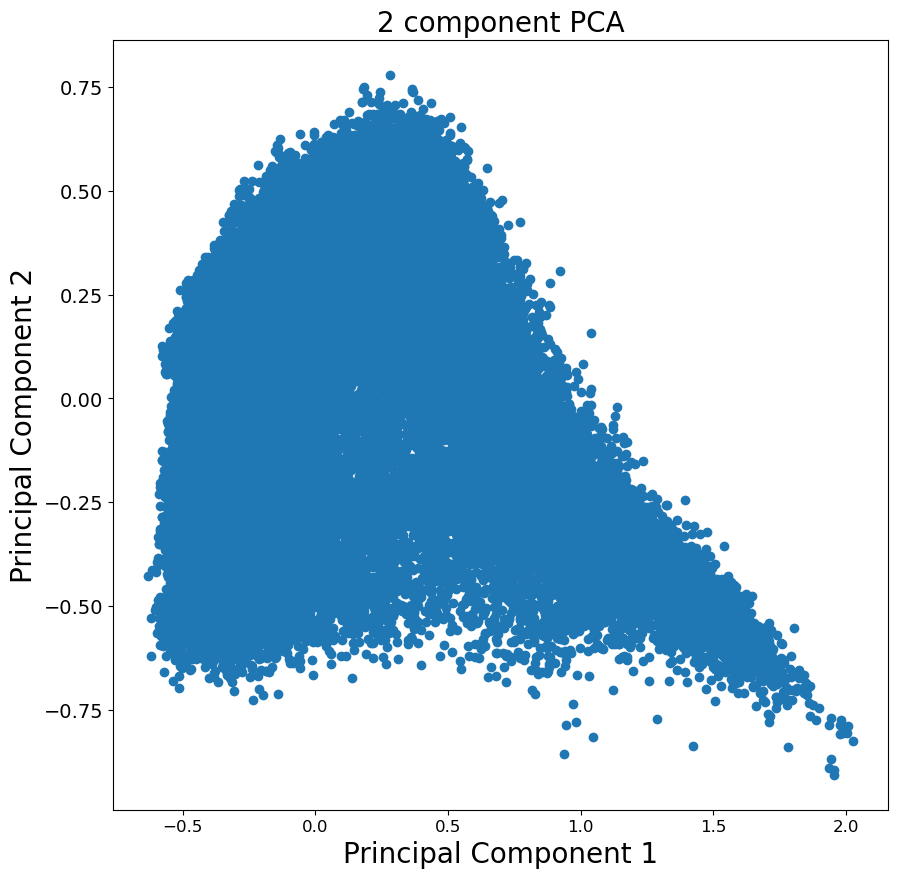

In [24]:
# plot the PCA

import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1', fontsize=20)
plt.ylabel('Principal Component 2', fontsize=20)
plt.title('2 component PCA', fontsize=20)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.show()


In [11]:
# save the PCA data into a csv file

principalDf.to_csv('../data/t5_embeddings/t5_embeddings/pca_embeddings.csv')